In [1]:
import cv2 as cv
import numpy as np
import scipy.misc as misc
import matplotlib.pyplot as plt
import json
import random
from datetime import datetime
random.seed(datetime.now())

output_images_file = "data_set/images/"
output_labels_file = "data_set/labels/"

print ("done")

done


In [7]:
size = 256
border = 100
list_fonts = []
list_fonts.append(cv.FONT_HERSHEY_SIMPLEX)
list_fonts.append(cv.FONT_HERSHEY_PLAIN)
list_fonts.append(cv.FONT_HERSHEY_DUPLEX)
list_fonts.append(cv.FONT_HERSHEY_COMPLEX)
list_fonts.append(cv.FONT_HERSHEY_TRIPLEX)
list_fonts.append(cv.FONT_HERSHEY_COMPLEX_SMALL)
list_fonts.append(cv.FONT_HERSHEY_SCRIPT_SIMPLEX)
list_fonts.append(cv.FONT_HERSHEY_SCRIPT_COMPLEX)

list_rectangles = []

image = np.zeros((size, size))
for i in range(10):
    text = 'OpenCV'
    font = list_fonts[random.randint(0, len(list_fonts)-1)]
    scale = 0.1*(random.randint(3, 10))
    if scale >= 0.6:
        thickness = random.randint(1, 2)
    else:
        thickness = 1
    text_size, baseline = cv.getTextSize(text, font, scale, thickness)
#     print("text_size: ", text_size)
#     print("baseline: ", baseline)
    print(i)
    coordinates = []
    
    for j in range(size+2*border-text_size[0]):
        for k in range(size+2*border-(text_size[1]+baseline)):
            input_shape = [j-border, k+baseline-border, j+text_size[0]-border, k-text_size[1]-border]
#             print (input_shape)
            if(len(list_rectangles) > 0):
                for l in range(len(list_rectangles)):
                    # check if the input_shape overlaps the l rectangle
                    if(input_shape[2]<list_rectangles[l][0] or input_shape[0]>list_rectangles[l][2]):
                        # outside the rectangle in the x
                        if(input_shape[3]<list_rectangles[l][1] or input_shape[1]>list_rectangles[l][3]):
                            # outside the rectangle in the Y
                            coordinates.append((j, k))
            else:
                coordinates.append((j, k))
    if len(coordinates) > 0:
        # make random selection for new text position
        rand_coord = coordinates[random.randint(0, len(coordinates)-1)]
        x = rand_coord[0]
        y = rand_coord[1]
    else:
        print ("image is full")
        break
    
    cv.putText(image, text, (x, y), font, scale, 255, thickness, cv.LINE_AA)
    box_dim = [x, y+baseline, x+text_size[0], y-text_size[1]]
#     cv.rectangle(image, (box_dim[0], box_dim[1]), (box_dim[2], box_dim[3]), 255)

image = 255-image
misc.imsave(output_images_file+'words'+str(i)+'.jpg', image)

0
1
2
3
4
5
6
7
8
9


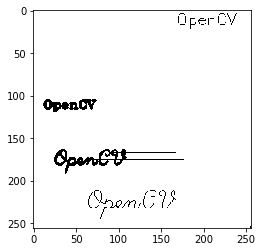

In [8]:

plt.imshow(image, cmap='gray')
plt.show()

In [78]:
misc.imsave('data_set/words'+str(0)+'.jpg', image)